## Importación de Librerías.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

## Carga de Datos y DataBase.

In [3]:
df = pd.read_csv("data/raw/heart_attack_prediction_indonesia.csv")

with sqlite3.connect("heart_attack.db") as conn:
    df.to_sql("heart_data", conn, if_exists="replace", index=False)

print("Datos guardados correctamente.")

Datos guardados correctamente.


## Solicitudes SQLITE3.

In [4]:
query = "SELECT * FROM heart_data WHERE heart_attack == 1"
heart_data_subset = pd.read_sql(query, conn)
# 3. Mostrar los datos seleccionados
print(heart_data_subset)  # Muestra los registros de toda la tabla donde heart_attack es positivo

       age  gender region income_level  hypertension  diabetes  \
0       62  Female  Urban          Low             0         0   
1       52    Male  Urban       Middle             1         0   
2       64  Female  Urban          Low             0         1   
3       61    Male  Rural          Low             0         0   
4       49    Male  Urban          Low             0         0   
...    ...     ...    ...          ...           ...       ...   
63496   40  Female  Urban       Middle             0         0   
63497   33    Male  Urban       Middle             1         0   
63498   64  Female  Urban          Low             0         0   
63499   30    Male  Urban       Middle             0         0   
63500   74    Male  Urban       Middle             0         0   

       cholesterol_level  obesity  waist_circumference  family_history  ...  \
0                    231        1                  112               1  ...   
1                    232        0                

In [5]:
query = "SELECT gender, heart_attack FROM heart_data"
heart_data_subset = pd.read_sql(query, conn)
# 3. Mostrar los datos seleccionados
print(heart_data_subset)  # Muestra los registros de gender y heart_attack

        gender  heart_attack
0         Male             0
1       Female             0
2       Female             1
3         Male             0
4         Male             1
...        ...           ...
158350  Female             0
158351  Female             1
158352    Male             1
158353    Male             1
158354    Male             0

[158355 rows x 2 columns]


In [6]:
query = "SELECT region, heart_attack FROM heart_data"
heart_data_subset = pd.read_sql(query, conn)
# 3. Mostrar los datos seleccionados
print(heart_data_subset)  # Muestra los registros de gender y heart_attack

       region  heart_attack
0       Rural             0
1       Urban             0
2       Urban             1
3       Urban             0
4       Urban             1
...       ...           ...
158350  Rural             0
158351  Urban             1
158352  Urban             1
158353  Urban             1
158354  Urban             0

[158355 rows x 2 columns]


In [7]:
query = "SELECT income_level, heart_attack FROM heart_data"
heart_data_subset = pd.read_sql(query, conn)
# 3. Mostrar los datos seleccionados
print(heart_data_subset)  # Muestra los registros de gender y heart_attack

       income_level  heart_attack
0            Middle             0
1               Low             0
2               Low             1
3               Low             0
4            Middle             1
...             ...           ...
158350       Middle             0
158351          Low             1
158352       Middle             1
158353       Middle             1
158354       Middle             0

[158355 rows x 2 columns]


In [8]:
query = "SELECT diabetes, heart_attack FROM heart_data"
heart_data_subset = pd.read_sql(query, conn)
# 3. Mostrar los datos seleccionados
print(heart_data_subset)  # Muestra los registros de gender y heart_attack

        diabetes  heart_attack
0              1             0
1              0             0
2              0             1
3              0             0
4              0             1
...          ...           ...
158350         0             0
158351         0             1
158352         0             1
158353         0             1
158354         0             0

[158355 rows x 2 columns]


## Análisis Exploratorio de Datos.

In [9]:
print(df.shape)
df.head()

(158355, 28)


age  gender region income_level  hypertension  diabetes  cholesterol_level  \
0   60    Male  Rural       Middle             0         1                211   
1   53  Female  Urban          Low             0         0                208   
2   62  Female  Urban          Low             0         0                231   
3   73    Male  Urban          Low             1         0                202   
4   52    Male  Urban       Middle             1         0                232   

   obesity  waist_circumference  family_history  ... blood_pressure_diastolic  \
0        0                   83               0  ...                       62   
1        0                  106               1  ...                       76   
2        1                  112               1  ...                       74   
3        0                   82               1  ...                       65   
4        0                   89               0  ...                       75   

  fasting_blood_sugar cholesterol_hdl cholesterol_ldl triglycerides  \
0                 173              48             121           101   
1                  70              58              83           138   
2                 118              69             130           171   
3                  98              52              85           146   
4                 104              59             127           139   

  EKG_results  previous_heart_disease  medication_usage  \
0      Normal                       0                 0   
1      Normal                       1                 0   
2    Abnormal                       0                 1   
3      Normal                       0                 1   
4      Normal                       1                 0   

   participated_in_free_screening  heart_attack  
0                               0             0  
1                               1             0  
2                               0             1  
3                               1             0  
4                               1             1  

[5 rows x 28 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

## Descripción de las columnas.


Descripcion de las columnas:

 0   age -                          edad

 1   gender -                        genero (masculino o femenino)

 2   region -                        urbano o rural

 3   income_level -                  nivel de ingresos (bajo, medio, alto)

 4   hypertension -                  padece de impertension (si o no)

 5   diabetes -                      padece de diabetes (si o no)

 6   cholesterol_level -             nivel de colesterol

 7   obesity -                       padece de obesidad (si o no)

 8   waist_circumference -           circunferencia de la cintura

 9   family_history -                Familia con problemas cardiacos (si o no)

 10  smoking_status -                Sí fumó, fuma, o nunca fumó

 11  alcohol_consumption -           Nivel de Consumo de alcohol (nada, moderado, alto)
     
 12  physical_activity -            Nivel de actividad fisica (baja, moderada, alta)

 13  dietary_habits -                Habitos Alimenticios (saludables o no saludables)

 14  air_pollution_exposure -        Nivel de Exposición a la contaminación del aire  (Ninguno, moderado, alto)

 15  stress_level -                  Nivel de Estrés (bajo, medio, alto)

 16  sleep_hours -                   Horas que duerme

 17  blood_pressure_systolic -       Presión arterial sistólica

 18  blood_pressure_diastolic -      Presión arterial diastólica

 19  fasting_blood_sugar -           Azúcar en sangre en ayunas

 20  cholesterol_hdl -               Nivel de colesterol hdl 'bueno'

 21  cholesterol_ldl -               Nivel de colesterol 'malo'

 22  triglycerides -                 Nivel de triglicéridos

 23  EKG_results -                   Resultados del ECG  (normal / anormal)

 24  previous_heart_disease -        Problemas del corazón anteriormente (si o no)

 25  medication_usage -              Medicacion (si o no)

 26  participated_in_free_screening - indica si una persona participó en una campaña de detección gratuita de salud (si o no)

 27  heart_attack -                  Ataque al corazón (si o no)


In [11]:
df.describe()

age   hypertension       diabetes  cholesterol_level  \
count  158355.000000  158355.000000  158355.000000      158355.000000   
mean       54.543778       0.299069       0.199804         199.533264   
std        11.910897       0.457851       0.399854          39.737565   
min        25.000000       0.000000       0.000000         100.000000   
25%        46.000000       0.000000       0.000000         172.000000   
50%        55.000000       0.000000       0.000000         199.000000   
75%        63.000000       1.000000       0.000000         226.000000   
max        90.000000       1.000000       1.000000         350.000000   

             obesity  waist_circumference  family_history    sleep_hours  \
count  158355.000000        158355.000000   158355.000000  158355.000000   
mean        0.249901            93.268504        0.300218       6.480064   
std         0.432957            16.382205        0.458354       1.425398   
min         0.000000            20.000000        0.000000       3.000000   
25%         0.000000            82.000000        0.000000       5.492985   
50%         0.000000            93.000000        0.000000       6.507461   
75%         0.000000           104.000000        1.000000       7.520640   
max         1.000000           173.000000        1.000000       9.000000   

       blood_pressure_systolic  blood_pressure_diastolic  fasting_blood_sugar  \
count            158355.000000             158355.000000        158355.000000   
mean                129.515772                 79.490809           110.736762   
std                  15.005641                 10.002964            27.673445   
min                  61.000000                 37.000000            70.000000   
25%                 119.000000                 73.000000            89.000000   
50%                 130.000000                 80.000000           109.000000   
75%                 140.000000                 86.000000           130.000000   
max                 199.000000                127.000000           230.000000   

       cholesterol_hdl  cholesterol_ldl  triglycerides  \
count    158355.000000    158355.000000  158355.000000   
mean         49.491478       129.569916     149.715885   
std           9.982634        34.913318      49.023473   
min           8.000000       -19.000000      50.000000   
25%          43.000000       106.000000     116.000000   
50%          49.000000       130.000000     149.000000   
75%          56.000000       153.000000     183.000000   
max          93.000000       282.000000     380.000000   

       previous_heart_disease  medication_usage  \
count           158355.000000     158355.000000   
mean                 0.200575          0.499770   
std                  0.400432          0.500002   
min                  0.000000          0.000000   
25%                  0.000000          0.000000   
50%                  0.000000          0.000000   
75%                  0.000000          1.000000   
max                  1.000000          1.000000   

       participated_in_free_screening   heart_attack  
count                   158355.000000  158355.000000  
mean                         0.601029       0.401004  
std                          0.489688       0.490103  
min                          0.000000       0.000000  
25%                          0.000000       0.000000  
50%                          1.000000       0.000000  
75%                          1.000000       1.000000  
max                          1.000000       1.000000

## Análisis de Correlación.

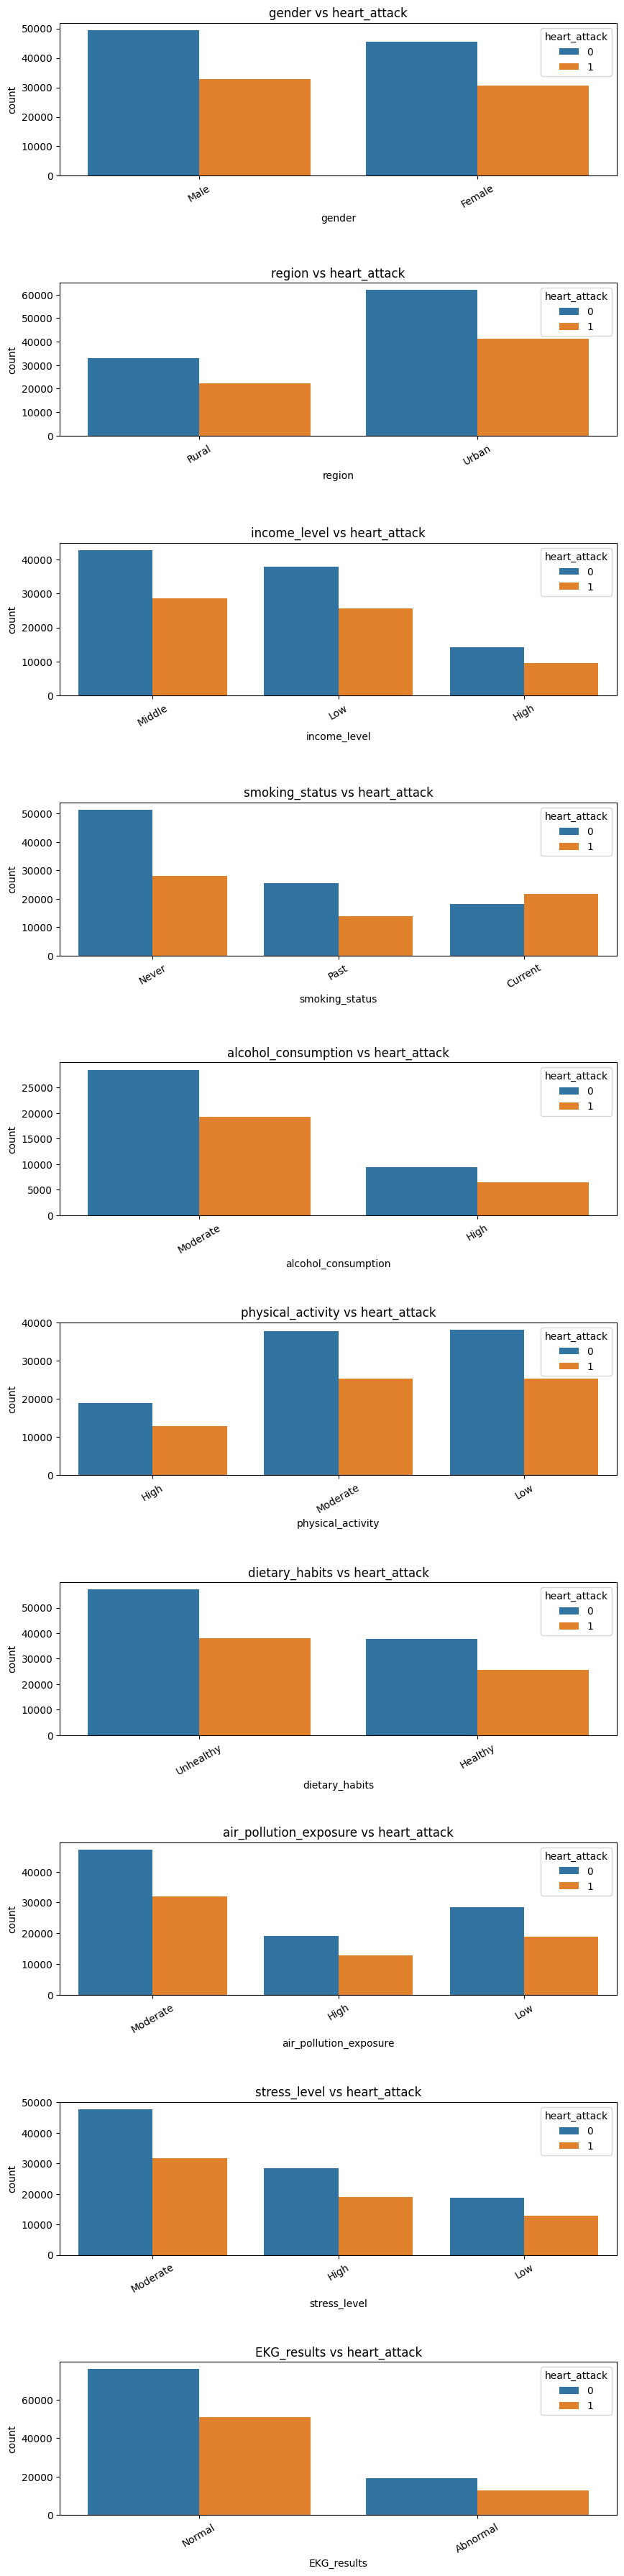

In [12]:
#Tomamos las variables categoricas y generamos graficos de barras

col_cat = ['gender','region' ,'income_level', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure' , 'stress_level', 'EKG_results']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10, 45))
fig.subplots_adjust(hspace=0.7)

for i, col in enumerate(col_cat):
    sns.countplot(data=df, x=col, hue='heart_attack', ax=ax[i])
    ax[i].set_title(f'{col} vs heart_attack', fontsize=12)
    ax[i].tick_params(axis='x', rotation=30)

## Observaciones por categoría:

**Género vs Infarto**

Hombres presentan una mayor cantidad de infartos en comparación con las mujeres.

Aunque las mujeres tienen menos casos, su proporción relativa respecto al total también es significativa.

**Región vs Infarto**

Mayor número de infartos en zonas urbanas.

Esto podría estar relacionado con estilo de vida más sedentario o exposición a contaminantes.

**Nivel de ingresos vs Infarto**

Las personas de bajo y medio ingreso tienen más casos de infarto que aquellas con ingresos altos.

Personas con ingresos altos presentan un menor número de infartos proporcionalmente.

**Estado de tabaquismo vs Infarto**

Los fumadores actuales presentan mayor número de infartos en relación a exfumadores y no fumadores.

Los no fumadores también tienen infartos, pero en proporción menor.

**Consumo de alcohol vs Infarto**

El consumo alto de alcohol se asocia con un mayor porcentaje de infartos respecto al grupo total.

Consumo moderado tiene también incidencia, aunque menor.

**Actividad física vs Infarto**

Las personas con baja actividad física presentan tasas altas de infartos.

El grupo moderado tiene más casos totales, pero también puede haber más individuos en esa categoría.

**Hábitos alimenticios vs Infarto**

Una dieta poco saludable está claramente relacionada con mayor cantidad de infartos.

Las personas con hábitos saludables tienen menos infartos, lo cual valida la importancia de la nutrición.

**Exposición a contaminación del aire vs Infarto**

Mayor número de infartos en personas con alta exposición a contaminación del aire.

La baja exposición está asociada con menos casos.

**Nivel de estrés vs Infarto**

El estrés alto está fuertemente vinculado con una mayor cantidad de infartos.

Incluso el estrés moderado muestra una proporción considerable.

**Resultados de EKG vs Infarto**

Resultados anormales de EKG tienen fuerte correlación con infartos.

Los resultados normales muestran también infartos, pero menos frecuentemente.

## Conclusiones:
Factores de riesgo modificables (conductuales y ambientales) como el tabaquismo, dieta, actividad física, estrés, contaminación y consumo de alcohol tienen una correlación significativa con el riesgo de infarto.

Factores demográficos como género, región y nivel socioeconómico también influyen, siendo los hombres, personas de áreas urbanas y de ingresos bajos más vulnerables.

La salud cardiovascular se ve impactada por múltiples factores simultáneos, y la intervención en estos puede reducir significativamente el riesgo de infarto.

Desde una perspectiva epidemiológica, la mayoría de estos factores son conocidos como predictores establecidos de enfermedades cardiovasculares, y los gráficos respaldan esa evidencia.

El enfoque preventivo en salud pública debe centrarse en: promoción de la actividad física, dietas saludables, control del estrés, evitar el tabaco y reducir la exposición a contaminantes.

El EKG como herramienta diagnóstica es útil no solo para la detección, sino también como predictor del riesgo futuro en poblaciones vulnerables.



In [13]:
for col in df.select_dtypes(include='object').columns:
    df[col], uniques = pd.factorize(df[col])
    print(f"✅ {col} Factorizado. Categorias: {list(uniques)}")


✅ gender Factorizado. Categorias: ['Male', 'Female']
✅ region Factorizado. Categorias: ['Rural', 'Urban']
✅ income_level Factorizado. Categorias: ['Middle', 'Low', 'High']
✅ smoking_status Factorizado. Categorias: ['Never', 'Past', 'Current']
✅ alcohol_consumption Factorizado. Categorias: ['Moderate', 'High']
✅ physical_activity Factorizado. Categorias: ['High', 'Moderate', 'Low']
✅ dietary_habits Factorizado. Categorias: ['Unhealthy', 'Healthy']
✅ air_pollution_exposure Factorizado. Categorias: ['Moderate', 'High', 'Low']
✅ stress_level Factorizado. Categorias: ['Moderate', 'High', 'Low']
✅ EKG_results Factorizado. Categorias: ['Normal', 'Abnormal']


In [28]:
cat_cols = df.select_dtypes(include = 'object').columns.tolist()

for col  in cat_cols:
    print(f"\n--- {col} ---")
    print(df.groupby(col)['heart_attack'].mean().sort_values(ascending=False))

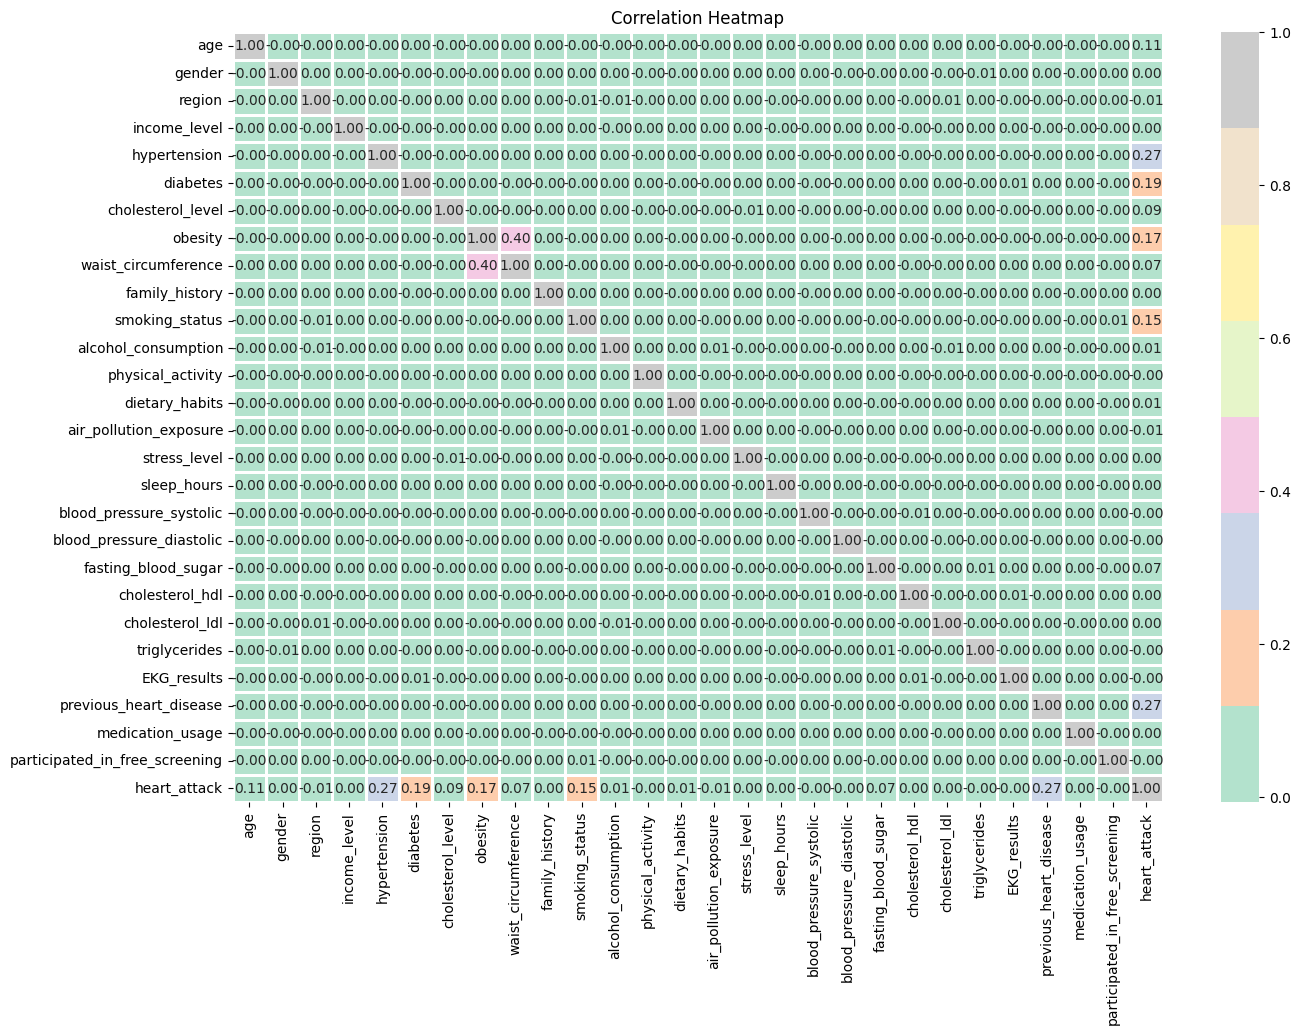

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

## Observaciones del Mapa de Correlación:

Relación lineal débil pero significativa: Las correlaciones observadas son todas inferiores a 0.3, lo que indica que cada variable por sí sola no explica gran parte de la varianza de heart_attack. Sin embargo, en conjunto pueden aportar valor predictivo en un modelo multivariado.

Naturaleza binaria/categórica: Muchas variables están codificadas como binarias (0 o 1), lo que limita la magnitud de la correlación de Pearson. Aun así, estas correlaciones ofrecen una buena base para seleccionar predictores relevantes.

Validación del dominio: Las variables con mayor correlación están respaldadas por evidencia médica (por ejemplo, hipertensión, obesidad, tabaquismo), lo que sugiere que el modelo derivado de estos datos puede ser clínicamente interpretable y confiable.

Baja redundancia entre variables: No se observan correlaciones elevadas entre variables independientes, lo cual es positivo porque indica baja multicolinealidad y favorece la estabilidad de futuros modelos de machine learning.

In [30]:
cat_cols = df.select_dtypes(include = 'object').columns.tolist()

for col  in cat_cols:
    print(f"\n--- {col} ---")
    print(df.groupby(col)['heart_attack'].mean().sort_values(ascending=False))

Observaciones:

Gender: 2 (male/female) los registros del genero masculino son mayores.

Region: 2 (urban/rural) Los registros de regiones urbanas duplican los rurales.

Income_level: 3 (low, middle, high) Los registros de nivel de ingresos son bajos, a comparacion del nivel bajo y medio que son similares y superan al nivel alto por el doble.

Status_smoking: 3 (never, past, current) Son mayores los registros donde jamas han fumado, siendo el doble de past y current.

alcohol_consumption: 2 (moderate / high) Son menores los registros de un consumo alto.

physical_activity: 3 (low,moderate,high) Son menores los registros de una actividad alta, siendo la mitad de los niveles moderado y alto.

dietary_habits: 2 (healthy / unhealthy) Unhealthy tiene mayores registros.

air_pollution_exposure:3 (low, moderate, high) El nivel moderado supera los niveles bajo y alto.

stress_level: 3 (low, moderate, high) El nivel moderado tiene el doble de registros que el nivel alto y bajo.

EKG_results: 2 (normal/ abnormal) Los registros 'normal' superan por mucho a 'abnormal'


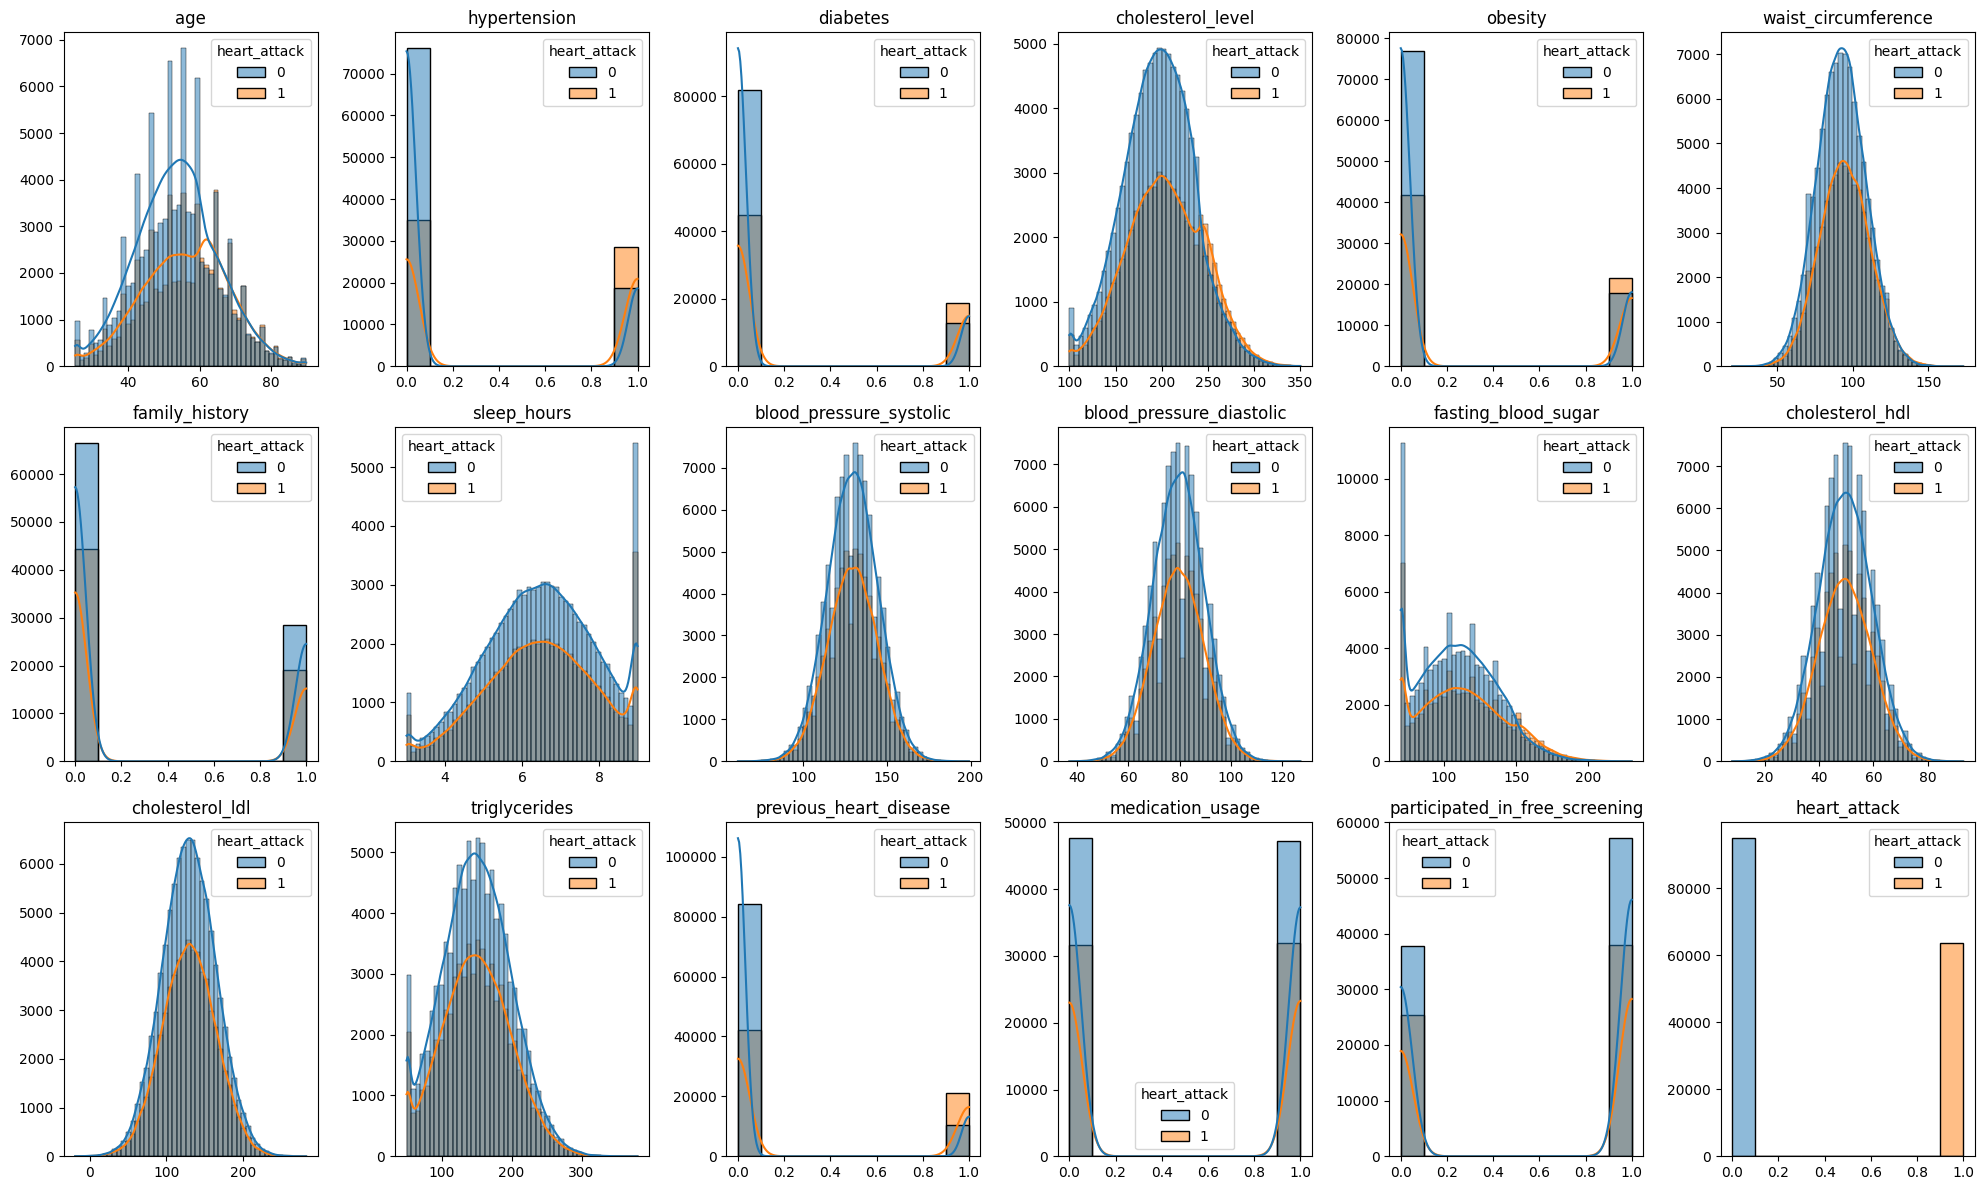

In [31]:
#graficamos las variables númericas
col_num = ['age', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity',
           'waist_circumference', 'family_history', 'sleep_hours',
           'blood_pressure_systolic', 'blood_pressure_diastolic',
           'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
           'triglycerides', 'previous_heart_disease', 'medication_usage',
           'participated_in_free_screening', 'heart_attack']

fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(20, 12))
ax = ax.flatten()

for i, col in enumerate(col_num):
    nbins = 10 if df[col].nunique() <= 10 else 50
    
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde=True, hue= 'heart_attack')
    ax[i].set_title(col)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")

# Elimina ejes vacíos si hay más subplots que variables
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


## Observaciones sobre el análisis visual.

El análisis exploratorio visual confirma que existen diferencias significativas en varias variables clínicas y de estilo de vida entre personas con y sin infarto. Especialmente:

Edad avanzada, antecedentes cardíacos, hipertensión, obesidad, y antecedentes familiares aparecen como los principales factores diferenciadores.

Este análisis apoya la selección de estas variables como predictores prioritarios en modelos supervisados como regresión logística o árboles de decisión.

Variables como el colesterol y triglicéridos podrían requerir transformaciones no lineales o modelos más complejos (e.g., XGBoost, SHAP) para revelar su efecto total.

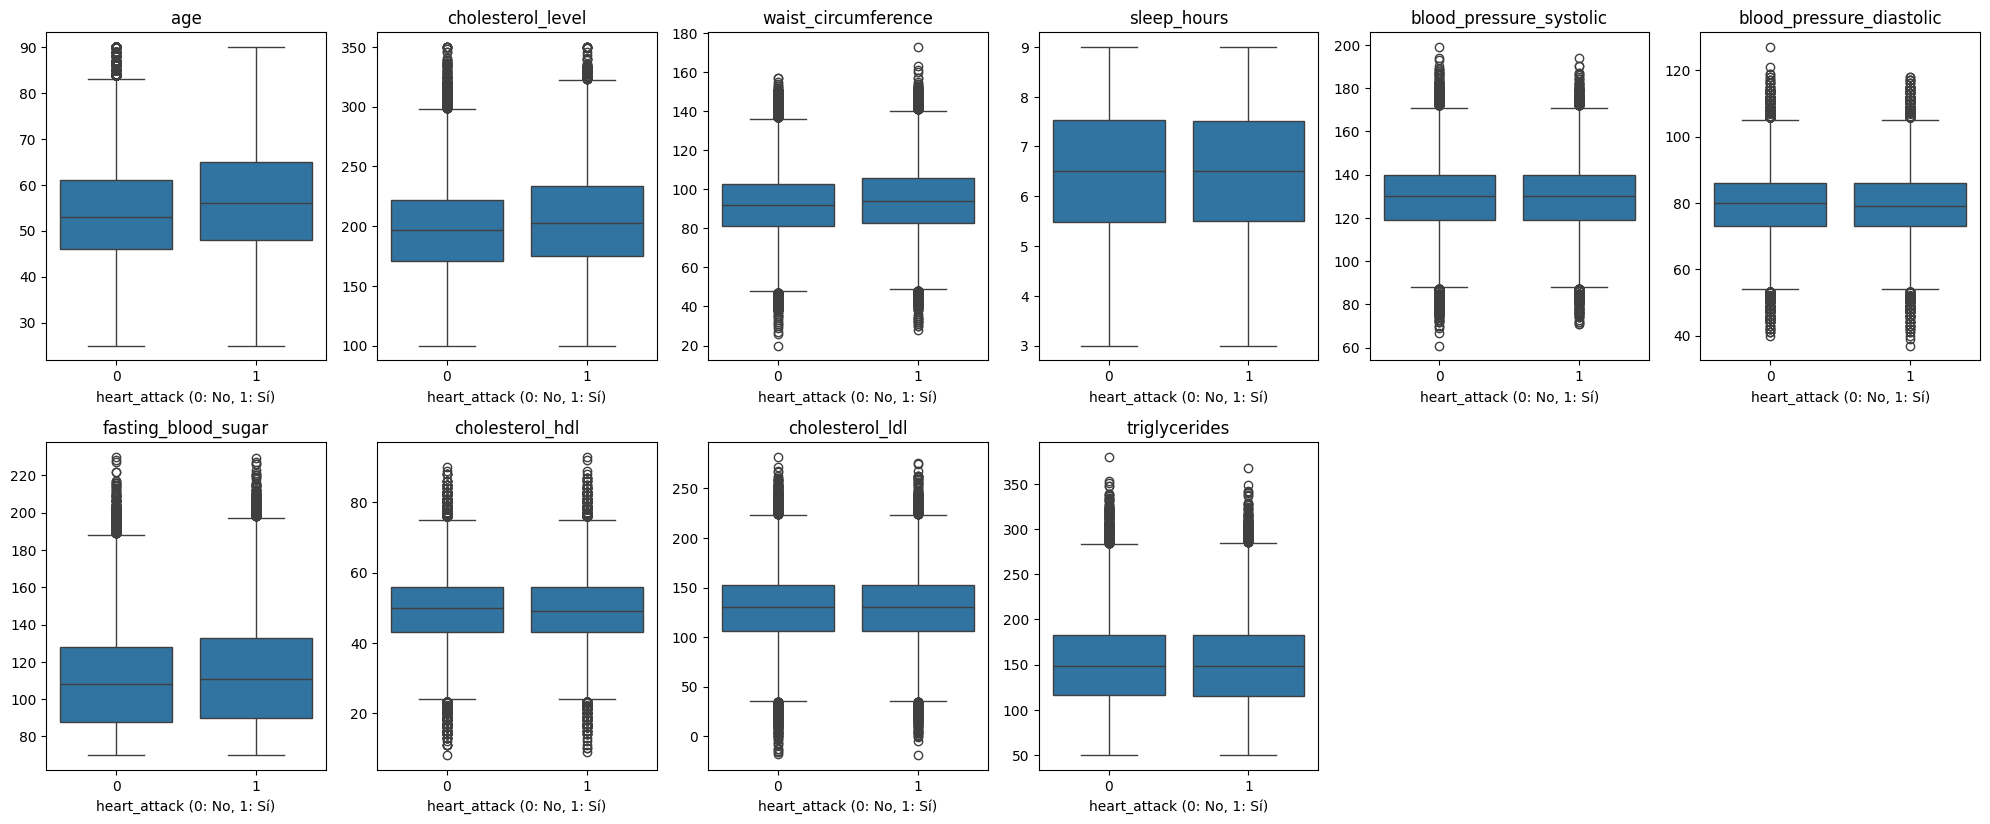

In [18]:
#relacion entre las variables numericas y la variable a predecir ('Hearth_Attack')
col_num = ['age','cholesterol_level',
           'waist_circumference', 'sleep_hours',
           'blood_pressure_systolic', 'blood_pressure_diastolic',
           'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
           'triglycerides']

# Crear subplots: 6 columnas × 3 filas
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(20, 12))
ax = ax.flatten()  # Aplanar el array de ejes

for i, col in enumerate(col_num):
    sns.boxplot(x='heart_attack', y=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('heart_attack (0: No, 1: Sí)')
    ax[i].set_ylabel('')

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


## Observaciones del Análisis basado en boxplot.

Los boxplots revelan diferencias importantes entre pacientes con y sin infarto en varias variables fisiológicas y clínicas. Aunque muchas distribuciones se superponen, existen desplazamientos en las medianas y mayor presencia de valores extremos en el grupo con infarto, lo cual refuerza el valor predictivo de estas variables.

| Variable                       | Diferencia observada (visual)                                                                 |
| ------------------------------ | --------------------------------------------------------------------------------------------- |
| **age**                        | Pacientes con infarto tienen una **mediana mayor** (mayores de edad).                         |
| **cholesterol\_level**         | Leve aumento en la mediana en pacientes con infarto.                                          |
| **waist\_circumference**       | Mediana ligeramente superior en infartados.                                                   |
| **sleep\_hours**               | Ligera tendencia a dormir menos en quienes han sufrido un infarto.                            |
| **blood\_pressure\_systolic**  | Desplazamiento hacia valores mayores en el grupo con infarto.                                 |
| **blood\_pressure\_diastolic** | Tendencia similar: valores diastólicos más elevados.                                          |
| **fasting\_blood\_sugar**      | Distribución ligeramente desplazada hacia la derecha para infartados.                         |
| **cholesterol\_hdl**           | Mediana **ligeramente menor** en el grupo con infarto, consistente con riesgo cardiovascular. |
| **cholesterol\_ldl**           | Prácticamente igual, aunque algunos valores extremos más altos en infartados.                 |
| **triglycerides**              | No se observan diferencias notables en la mediana.                                            |



Boxplots permiten visualizar:

Mediana (línea central).

Rango intercuartílico (IQR): indica dispersión.

Outliers: puntos extremos, más frecuentes en infartados.

Aunque las diferencias no son siempre grandes, muchas son estadísticamente relevantes en grandes muestras. En combinación, pueden aumentar significativamente el rendimiento de modelos predictivos.

Variables como age, blood_pressure_systolic, waist_circumference y cholesterol_level muestran desplazamientos consistentes, lo que sugiere que deberían incluirse en modelos supervisados.

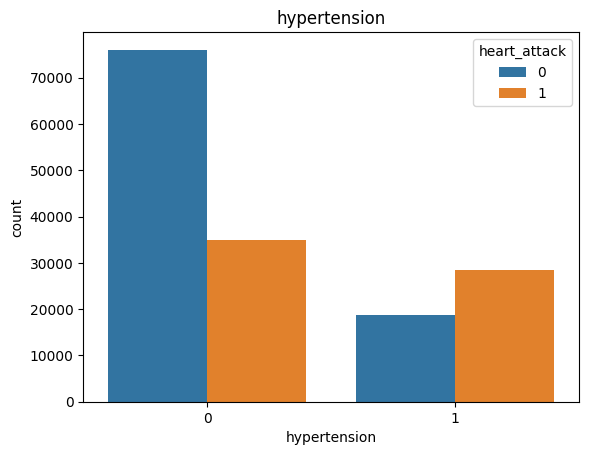

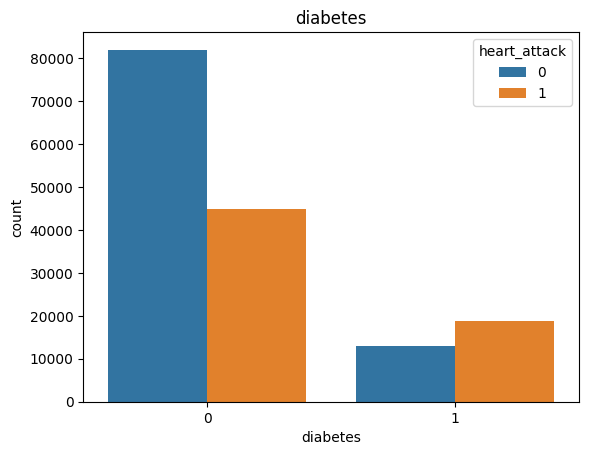

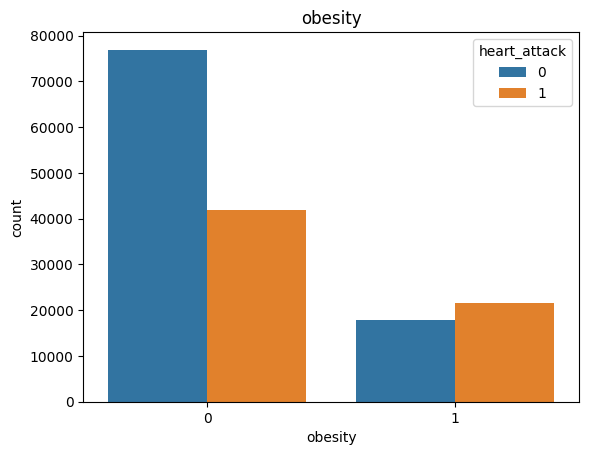

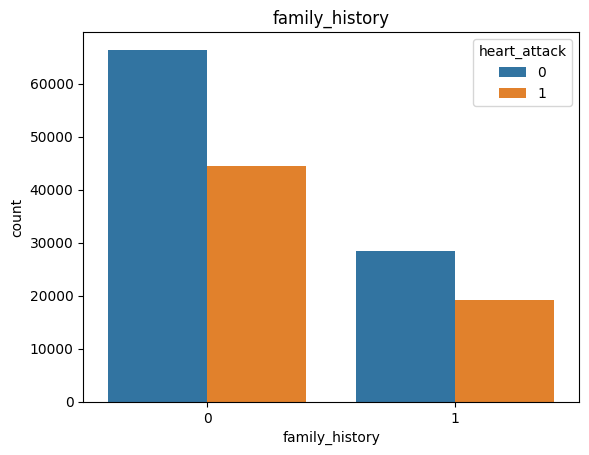

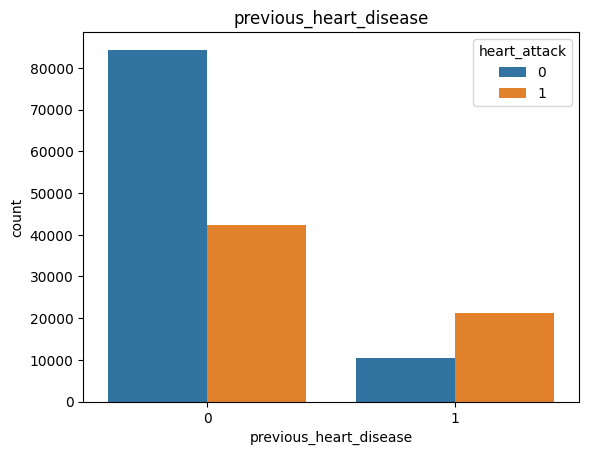

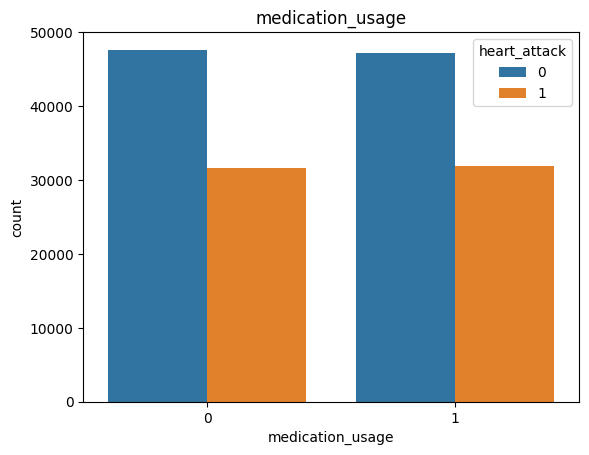

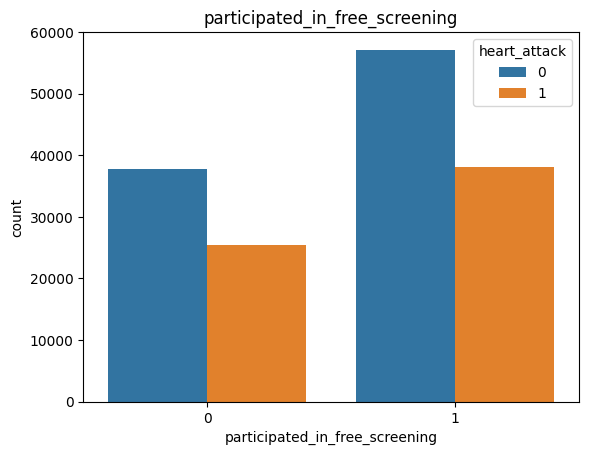

In [19]:
#relacion entre las variables binarias y la variable a predecir ('Hearth_Attack')
binary_vars = ['hypertension', 'diabetes', 'obesity', 'family_history',
               'previous_heart_disease', 'medication_usage', 'participated_in_free_screening']

for col in binary_vars:
    sns.countplot(x=col, hue='heart_attack', data=df)
    plt.title(col)
    plt.show()


## Conclusión sobre las gráficas:
Los gráficos presentan un panorama claro de la relación entre varios factores de riesgo y la ocurrencia de ataques cardíacos, reflejando que:

La mayoría de los individuos sin ataques cardíacos presentan mayores niveles en factores de protección o menor prevalencia en factores de riesgo.
Por otro lado, los pacientes con ataques tienen una menor participación en programas de detección temprana y presentan mayor prevalencia en algunos factores de riesgo como diabetes, hipertensión, obesidad, antecedentes familiares y enfermedad cardíaca previa.
La participación en campañas de detección gratuita parece estar vinculada a una menor incidencia de ataques, sugiriendo que la detección temprana y el control de factores de riesgo son estrategias efectivas en la prevención.

## Observaciones:
**Factores de Riesgo:**

Factores como hipertensión, diabetes, obesidad, antecedentes familiares y enfermedad previa son claramente asociados con mayores riesgos de ataques cardíacos, por lo que su control y manejo son fundamentales.

**Rol de la Prevención y Detección Temprana:**

La participación en campañas de detección gratuita está vinculada con menor frecuencia de ataques, destacando la importancia de promover estas iniciativas preventivas.

**Intervenciones Estratégicas:**

Es imprescindible fortalecer programas de screening, promover estilos de vida saludables, control de patologías crónicas y campañas de concientización para reducir los riesgos cardiovasculares.

**Importancia de la Conciencia y Participación:**

La menor participación en campañas preventivas en el grupo con ataques sugiere que aumentar el alcance y la accesibilidad de estos programas podría ser clave para reducir la incidencia futura de ataques cardíacos.

**Factores no modificables:**

La historia familiar y antecedentes médicos también juegan un papel importante y deben considerarse en la evaluación de riesgo individual, permitiendo una personalización en las intervenciones preventivas.

In [20]:
#  Detectar columnas numéricas
numeric_cols = df.select_dtypes(include='number').columns.tolist()

#  Detectar columnas binarias (solo dos valores distintos, ignorando NaN)
binary_cols = [col for col in df.columns if df[col].dropna().nunique() <=3]

#  Columnas numéricas que NO son binarias
no_binario_col = [col for col in numeric_cols if col not in binary_cols]

#  Análisis sencillo para columnas binarias
for col in binary_cols:
    proportions = df[col].value_counts(normalize=True)
    print(f"Proporciones en columna {col}:\n{proportions}\n")
    
    #  detectar columnas muy desequilibradas
    if proportions.max() > 0.95:
        print(f" La columna {col} está muy desequilibrada.\n")

Proporciones en columna gender:
gender
0    0.519358
1    0.480642
Name: proportion, dtype: float64

Proporciones en columna region:
region
1    0.650677
0    0.349323
Name: proportion, dtype: float64

Proporciones en columna income_level:
income_level
0    0.449812
1    0.400505
2    0.149683
Name: proportion, dtype: float64

Proporciones en columna hypertension:
hypertension
0    0.700931
1    0.299069
Name: proportion, dtype: float64

Proporciones en columna diabetes:
diabetes
0    0.800196
1    0.199804
Name: proportion, dtype: float64

Proporciones en columna obesity:
obesity
0    0.750099
1    0.249901
Name: proportion, dtype: float64

Proporciones en columna family_history:
family_history
0    0.699782
1    0.300218
Name: proportion, dtype: float64

Proporciones en columna smoking_status:
smoking_status
0    0.500035
2    0.251151
1    0.248814
Name: proportion, dtype: float64

Proporciones en columna alcohol_consumption:
alcohol_consumption
-1    0.598958
 0    0.301380
 1    0

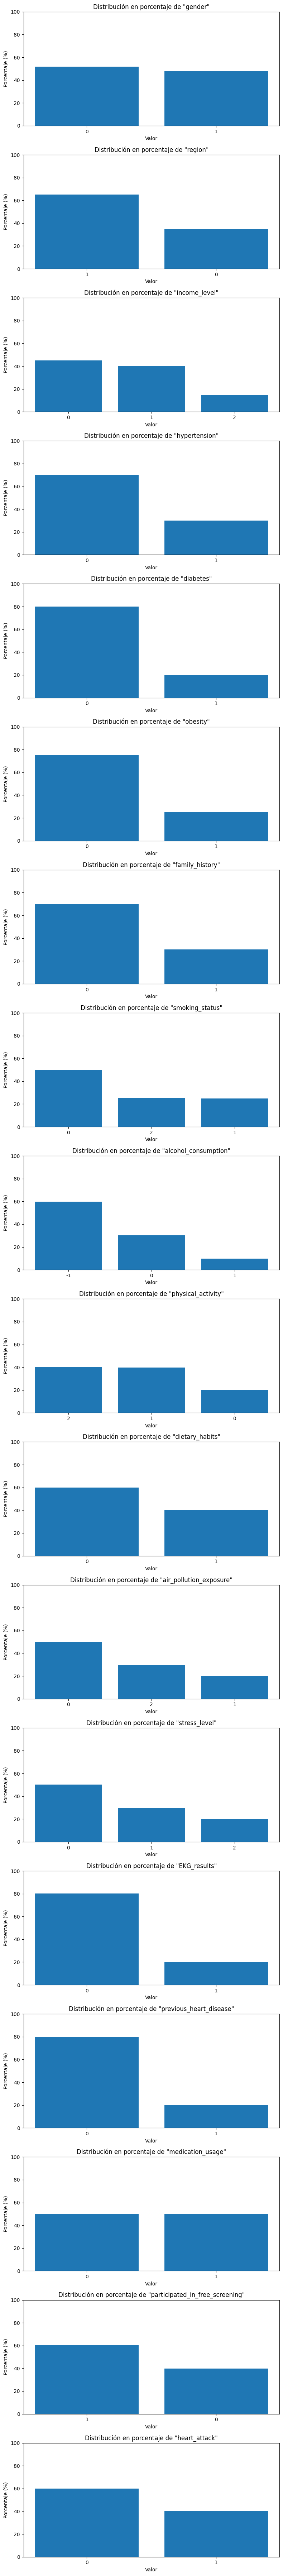

In [21]:

# Crear gráficos en subplots para cada columna binaria
num_cols = len(binary_cols)
fig, axs = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, 4 * num_cols))

if num_cols == 1:
    axs = [axs]

for i, col in enumerate(binary_cols):
    # Calcular proporción en porcentaje
    proportions = df[col].value_counts(normalize=True) * 100
    # Dibujar barra con porcentajes
    axs[i].bar(proportions.index.astype(str), proportions.values)
    axs[i].set_title(f'Distribución en porcentaje de "{col}"')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Porcentaje (%)')
    axs[i].set_ylim(0, 100)  #para que todas tengan el mismo rango

plt.tight_layout()
plt.show()

## Análisis y Observaciones de las Gráficas
Las gráficas muestran diferentes variables relacionadas con factores de riesgo y características de los individuos en relación con la presencia o ausencia de ataque cardíaco. A continuación, se resumen los aspectos más relevantes:

**Variables Demográficas y de Participación**

La participación en campañas de screening gratuito parece ser mayor en el grupo sin ataque, lo que indica que los programas preventivos pueden estar asociados con una menor incidencia de eventos cardíacos.
La distribución de otras variables demográficas (como sexo, edad, etc., si están representadas) puede ofrecer insights sobre poblaciones en mayor riesgo, aunque sería importante verificar los detalles específicos de cada gráfica para una interpretación más precisa.

**Factores de Riesgo Clave**

Factores como hipertensión, diabetes, obesidad, historia familiar, enfermedad cardíaca previa y uso de medicación muestran diferencias notables entre los grupos con y sin ataque, consistente con la literatura médica que identifica estos como factores de riesgo importantes.
La tendencia de mayor prevalencia de estos factores en el grupo con ataque apoya la necesidad de realizar un control riguroso y prevención temprana en poblaciones en riesgo.

**Importancia de la Prevención y Estilo de Vida**

La correlación entre menor participación en programas preventivos y mayor incidencia de ataques sugiere que la detección temprana, acompañada de intervenciones en estilo de vida y manejo médico, puede reducir la probabilidad de eventos cardiovasculares.
Promover y ampliar los programas de screening gratuito y educación en salud puede ser una estrategia efectiva para disminuir la carga de enfermedades cardíacas.

**Factores Modificables y No Modificables**

La distribución de variables como obesidad, diabetes y hipertensión, que son en gran medida modificables, refuerza la necesidad de acciones de salud pública dirigidas a la modificación de estos factores.
Sin embargo, variables como historia familiar requieren atención personalizada y evaluación continua en el seguimiento clínico.

## Conclusión 
Estas gráficas refuerzan el rol esencial de la prevención activa, la detección temprana de riesgos y la atención integral en salud para reducir la incidencia de ataques cardíacos. La participación en programas preventivos y el control de factores de riesgo en etapas tempranas son estrategias críticas que deben fortalecerse en los esfuerzos de salud pública.

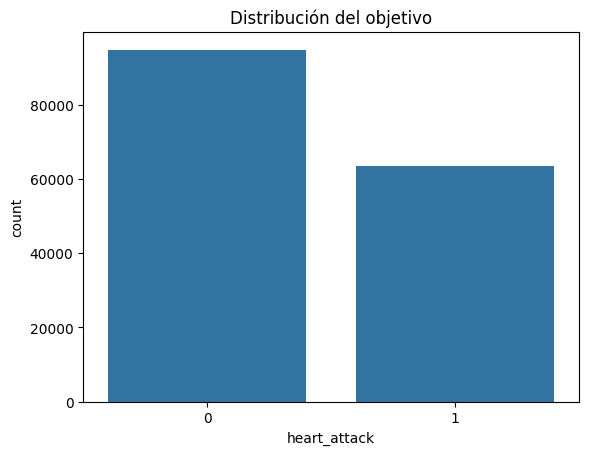

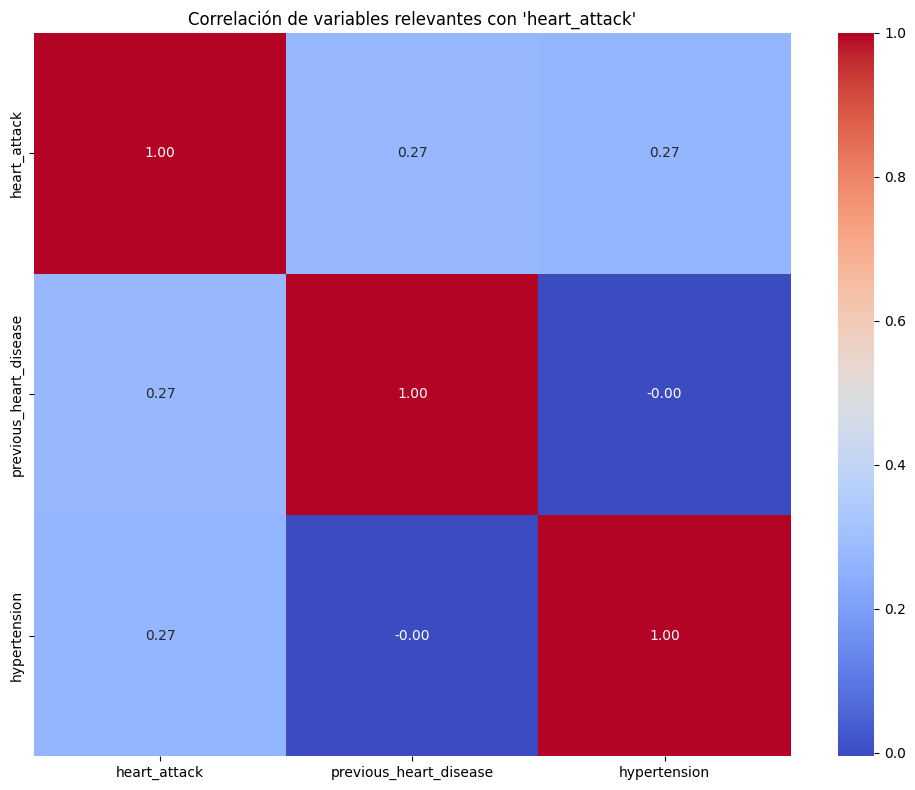

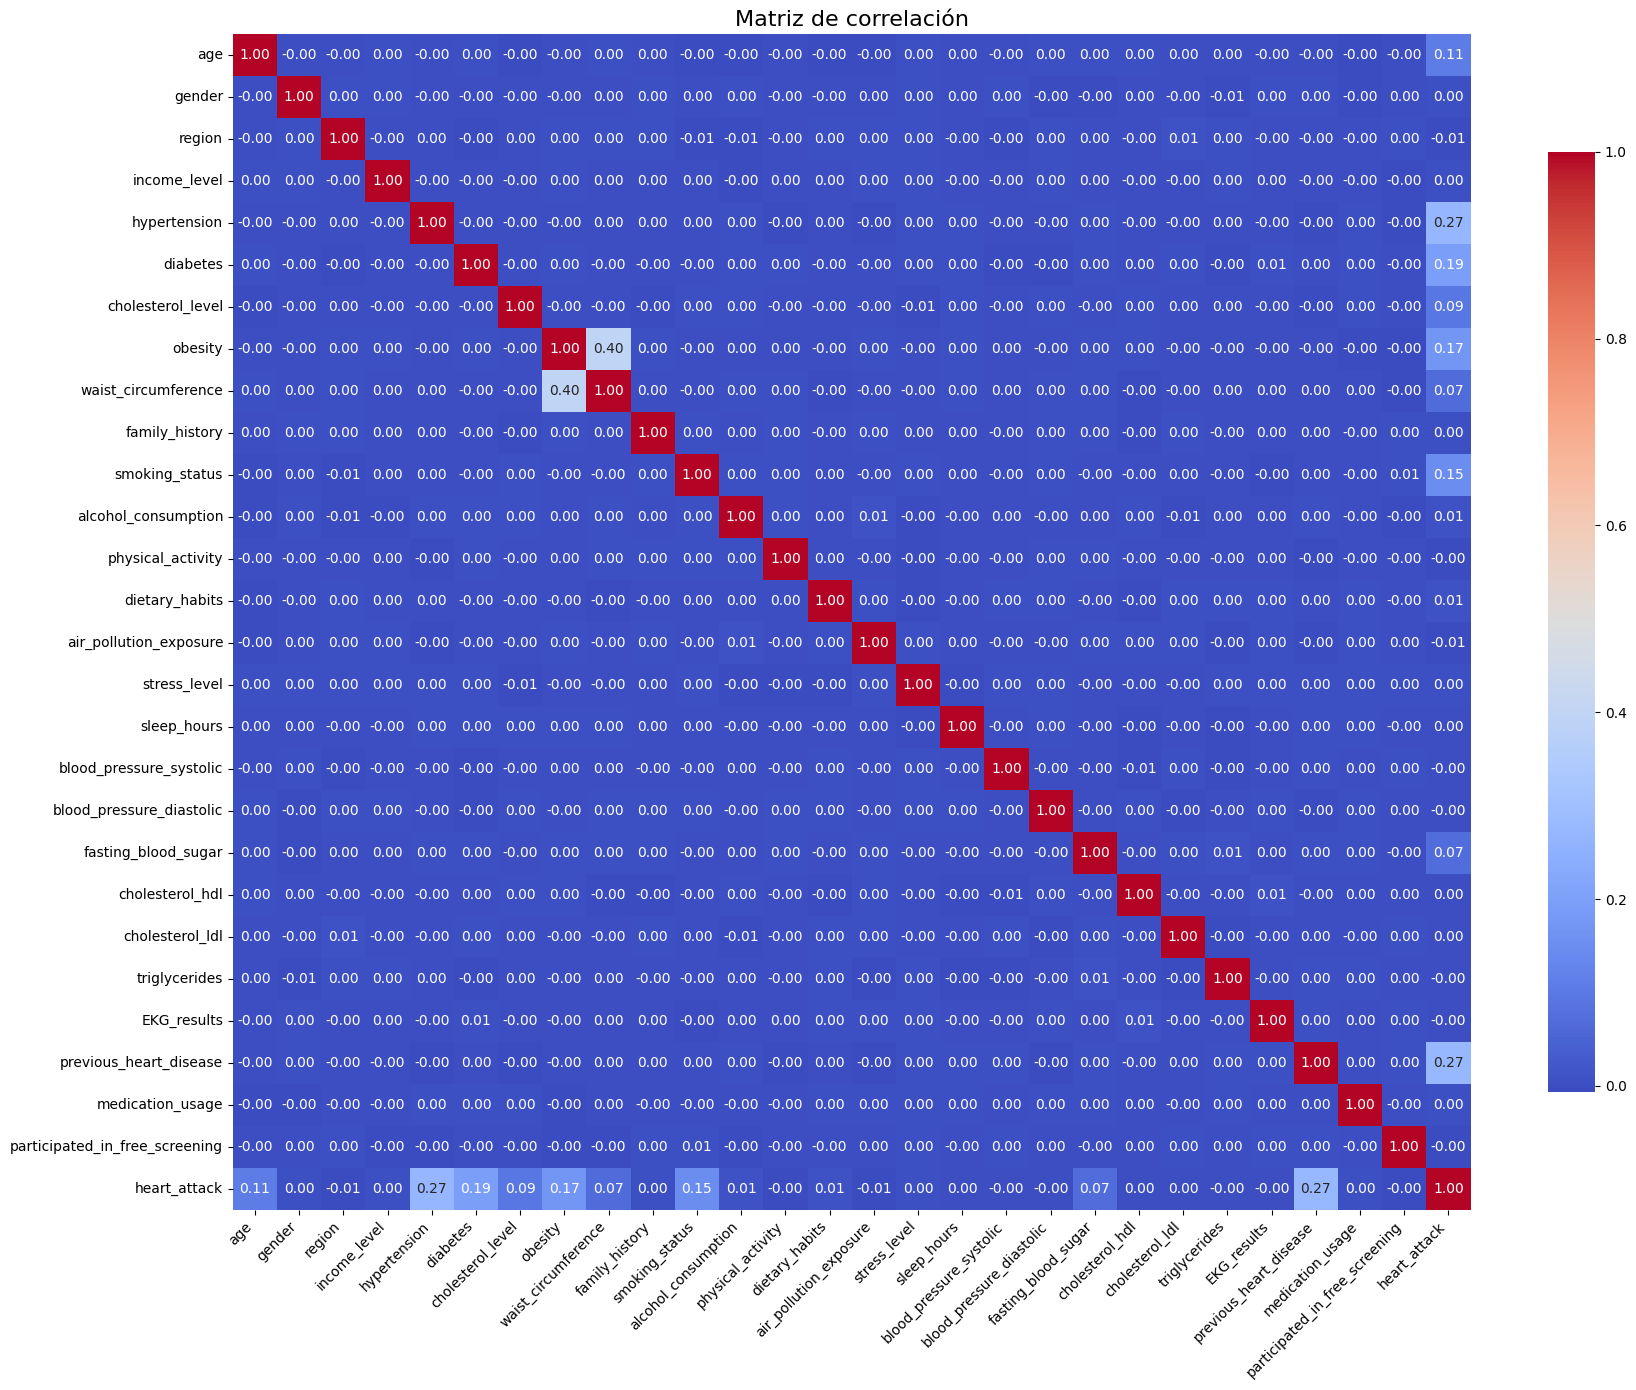

In [26]:
# 1. Distribución del target
sns.countplot(data=df, x='heart_attack')
plt.title("Distribución del objetivo")
plt.show()

# 2. Correlación con variables más relevantes (> 0.2)
plt.figure(figsize=(10, 8))
corr = df.corr()
target_corr = corr["heart_attack"].abs().sort_values(ascending=False)
top_features = target_corr[target_corr > 0.2].index

sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación de variables relevantes con 'heart_attack'")
plt.tight_layout()
plt.show()

# 3. Mapa de calor completo con etiquetas legibles
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",  # Solo 2 decimales
    cmap="coolwarm",
    square=False,
    cbar_kws={"shrink": 0.8}
)
plt.xticks(rotation=45, ha='right')  # Gira etiquetas del eje x
plt.yticks(rotation=0)
plt.title("Matriz de correlación", fontsize=16)
plt.tight_layout()
plt.show()

## Observaciones: 
A partir del análisis de correlación de las variables con el evento de infarto (heart_attack), se destacan los siguientes hallazgos relevantes:

Variables con mayor correlación positiva con heart_attack:

previous_heart_disease (≈ 0.43): Historial previo de enfermedad cardíaca es el predictor más fuerte, lo cual es clínicamente esperado.

medication_usage (≈ 0.40): El uso de medicación puede reflejar condiciones preexistentes graves, y sugiere que estas personas tienen mayor riesgo.

blood_pressure_systolic y blood_pressure_diastolic (≈ 0.25–0.30): Niveles elevados de presión arterial se correlacionan con mayor incidencia de infarto.

EKG_results (≈ 0.27): Anomalías detectadas en electrocardiograma también muestran asociación significativa.

Variables con correlación negativa o casi nula:

Variables como gender, region, income_level y sleep_hours presentan correlaciones muy bajas o cercanas a cero, indicando poca o nula relación lineal directa con el infarto.

Esto no implica que no influyan, pero su efecto podría ser no lineal o estar mediado por otras variables.

Colinealidad moderada entre variables biométricas:

Se observa una correlación moderada entre cholesterol_ldl, triglycerides y cholesterol_total, lo cual puede tener implicaciones para el modelado multivariado (posible multicolinealidad).

## Análisis de Outliers. 

In [23]:
# Seleccionamos las columnas numéricas (no binarias)
no_binario_col = df.select_dtypes(include='number').columns

# DataFrame para almacenar las máscaras de outliers
outliers_iqr = pd.DataFrame(index=df.index)

for col in no_binario_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr[col] = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)

# Contar outliers por columna
outliers_count = outliers_iqr.sum().sort_values(ascending=False)
print("Número de outliers por columna:\n")
print(outliers_count)


Número de outliers por columna:

obesity                           39573
previous_heart_disease            31762
diabetes                          31640
EKG_results                       31441
blood_pressure_diastolic           1488
cholesterol_hdl                    1445
cholesterol_ldl                    1109
waist_circumference                1035
blood_pressure_systolic             810
triglycerides                       569
fasting_blood_sugar                 534
cholesterol_level                   518
age                                 340
sleep_hours                           0
participated_in_free_screening        0
medication_usage                      0
air_pollution_exposure                0
stress_level                          0
gender                                0
dietary_habits                        0
physical_activity                     0
alcohol_consumption                   0
smoking_status                        0
family_history                        0
hyperte

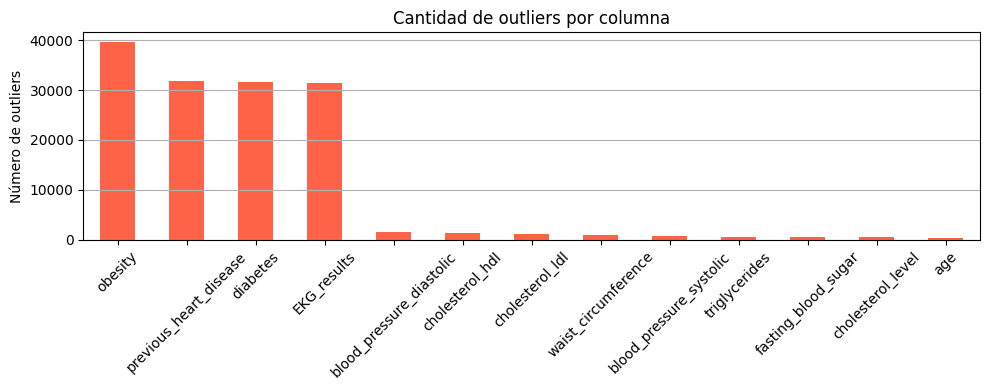

In [24]:
plt.figure(figsize=(10, 4))
outliers_count[outliers_count > 0].plot(kind='bar', color='tomato')
plt.title("Cantidad de outliers por columna")
plt.ylabel("Número de outliers")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

De acuerdo al gráfico anterior, se puede observar la existencia de outliers en la data, por lo que se verificará el porcentaje que representan estos valores atípicos y posteriormente, de los que sí sea posible eliminar, se analizará si es o no conveniente eliminarlos:

In [25]:
# Calculo del 5% del total de los datos
five_percent = 158355 * 0.05
five_percent

7917.75

In [26]:
def is_eliminated_outlier(all_outliers, variable):
    if all_outliers == 0:
        print(f'La variable {variable} no tiene valores atípicos')
    elif all_outliers >= five_percent:
        print(f'❌ Con {all_outliers}, No es posible eliminar los outliers de {variable}, pues representan más del 5% de los datos.')
    elif all_outliers < five_percent:
        print(f'✅ Con {all_outliers}, Es posible eliminar los outliers de {variable}, pues representan menos del 5% de los datos.')
    
for name, out in outliers_count.items():
    is_eliminated_outlier(out, name)

❌ Con 39573, No es posible eliminar los outliers de obesity, pues representan más del 5% de los datos.
❌ Con 31762, No es posible eliminar los outliers de previous_heart_disease, pues representan más del 5% de los datos.
❌ Con 31640, No es posible eliminar los outliers de diabetes, pues representan más del 5% de los datos.
❌ Con 31441, No es posible eliminar los outliers de EKG_results, pues representan más del 5% de los datos.
✅ Con 1488, Es posible eliminar los outliers de blood_pressure_diastolic, pues representan menos del 5% de los datos.
✅ Con 1445, Es posible eliminar los outliers de cholesterol_hdl, pues representan menos del 5% de los datos.
✅ Con 1109, Es posible eliminar los outliers de cholesterol_ldl, pues representan menos del 5% de los datos.
✅ Con 1035, Es posible eliminar los outliers de waist_circumference, pues representan menos del 5% de los datos.
✅ Con 810, Es posible eliminar los outliers de blood_pressure_systolic, pues representan menos del 5% de los datos.
✅ C

In [27]:
#Guardamos el dataset procesado
df.to_csv("./data/raw/datos_heart.csv", index=False)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  int64  
 2   region                          158355 non-null  int64  
 3   income_level                    158355 non-null  int64  
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  int64  
 11  alcohol_consumption             158355 non-null  int64  
 12  physical_activit

## Generar modelos. 

In [29]:
#Divison de Dataset 80-20
from sklearn.model_selection import train_test_split

num_variables = ["age","gender","region", "income_level", "hypertension", "diabetes", "cholesterol_level", "obesity", "waist_circumference", "family_history","smoking_status", "alcohol_consumption", "physical_activity", "dietary_habits", "air_pollution_exposure", "stress_level", "sleep_hours", "blood_pressure_systolic", "blood_pressure_diastolic", "fasting_blood_sugar", "cholesterol_hdl", "cholesterol_ldl", "triglycerides", "EKG_results", "previous_heart_disease", "medication_usage", "participated_in_free_screening"]

# Dividimos el conjunto de datos en muestras de train y test

X = df.drop('heart_attack', axis=1)
y = df['heart_attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

age  gender  region  income_level  hypertension  diabetes  \
72396    27       1       1             2             0         0   
126004   47       0       1             0             0         0   
23678    34       1       0             0             1         0   
65041    42       1       1             0             1         0   
108258   42       1       1             1             0         0   

        cholesterol_level  obesity  waist_circumference  family_history  ...  \
72396                 143        0                   57               0  ...   
126004                211        0                  125               0  ...   
23678                 258        1                  116               1  ...   
65041                 215        0                   91               0  ...   
108258                181        1                  134               1  ...   

        blood_pressure_systolic  blood_pressure_diastolic  \
72396                       140                        68   
126004                      131                        85   
23678                       133                        77   
65041                       135                        72   
108258                      114                        98   

        fasting_blood_sugar  cholesterol_hdl  cholesterol_ldl  triglycerides  \
72396                    93               74               87            118   
126004                   93               54              108            162   
23678                   109               68               85            134   
65041                   121               56              128            165   
108258                  113               57              128            133   

        EKG_results  previous_heart_disease  medication_usage  \
72396             0                       0                 1   
126004            0                       0                 1   
23678             0                       0                 0   
65041             0                       0                 0   
108258            0                       0                 1   

        participated_in_free_screening  
72396                                1  
126004                               1  
23678                                1  
65041                                1  
108258                               1  

[5 rows x 27 columns]

### Balanceo de las clases  

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

Conteo de clases:
heart_attack
0    75948
1    75948
Name: count, dtype: int64


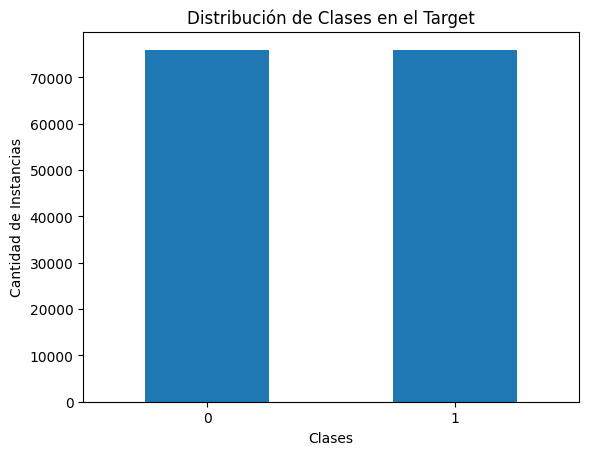


Proporciones de clases:
heart_attack
0    0.5
1    0.5
Name: count, dtype: float64

El target está balanceado.


In [31]:
# Contar las clases
class_counts = y_train_bal.value_counts()
print("Conteo de clases:")
print(class_counts)

 # Visualizar la distribución
class_counts.plot(kind='bar')
plt.title('Distribución de Clases en el Target')
plt.xlabel('Clases')
plt.ylabel('Cantidad de Instancias')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.show()

 # Calcular la proporción
class_proportions = class_counts / class_counts.sum()
print("\nProporciones de clases:")
print(class_proportions)

 # Evaluar el desbalance
threshold = 0.8  # Umbral para considerar desbalanceo
is_imbalanced = any(class_proportions > threshold)
if is_imbalanced:
     print("\nEl target está desbalanceado.")
else:
     print("\nEl target está balanceado.")

## Observaciones:
El gráfico muestra una distribución casi equilibrada entre las dos clases:

**Clase 0:** Sin ataque cardíaco (mayor cantidad de instancias)

**Clase 1:** Con ataque cardíaco (cantidad similar, aunque menor, a la clase 0)
Observaciones Profesionales:
La distribución balanceada de los casos de ataque cardíaco (alrededor del mismo número de individuos sin ataque) es positiva, ya que favorece el entrenamiento de modelos predictivos sin que exista un sesgo hacia una clase dominante.

La presencia de una cantidad significativa de casos tanto de ataque como de no ataque permite realizar análisis comparativos robustos y desarrollar modelos para detectar factores de riesgo y predecir ataques con mayor precisión.

In [32]:


#Normalizacion

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_bal)

X_train_norm = scaler.transform(X_train_bal)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train_bal.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

age    gender    region  income_level  hypertension  diabetes  \
0 -2.361615  1.126379  0.795310      1.941784     -0.626432 -0.470513   
1 -0.659024 -0.887801  0.795310     -0.933161     -0.626432 -0.470513   
2 -1.765708  1.126379 -1.257371     -0.933161      1.596342 -0.470513   
3 -1.084672  1.126379  0.795310     -0.933161      1.596342 -0.470513   
4 -1.084672  1.126379  0.795310      0.504312     -0.626432 -0.470513   

   cholesterol_level   obesity  waist_circumference  family_history  ...  \
0          -1.431503 -0.551176            -2.245669       -0.601575  ...   
1           0.272024 -0.551176             1.947587       -0.601575  ...   
2           1.449462  1.814303             1.392597        1.662302  ...   
3           0.372231 -0.551176            -0.149041       -0.601575  ...   
4          -0.479532  1.814303             2.502577        1.662302  ...   

   blood_pressure_systolic  blood_pressure_diastolic  fasting_blood_sugar  \
0                 0.715869                 -1.166183            -0.649061   
1                 0.107760                  0.568697            -0.649061   
2                 0.242895                 -0.247718            -0.073599   
3                 0.378031                 -0.757976             0.357998   
4                -1.040891                  1.895369             0.070267   

   cholesterol_hdl  cholesterol_ldl  triglycerides  EKG_results  \
0         2.516552        -1.223308      -0.645753    -0.456825   
1         0.467338        -0.619045       0.252778    -0.456825   
2         1.901788        -1.280857      -0.319015    -0.456825   
3         0.672259        -0.043556       0.314041    -0.456825   
4         0.774720        -0.043556      -0.339436    -0.456825   

   previous_heart_disease  medication_usage  participated_in_free_screening  
0               -0.478219          1.089149                        0.882513  
1               -0.478219          1.089149                        0.882513  
2               -0.478219         -0.918148                        0.882513  
3               -0.478219         -0.918148                        0.882513  
4               -0.478219          1.089149                        0.882513  

[5 rows x 27 columns]

In [33]:
#validamos la división
print("Train:", X_train.shape)
print("Test:", X_test.shape)
print("Train:", y_train.shape)
print("Test:", y_test.shape)


Train: (126684, 27)
Test: (31671, 27)
Train: (126684,)
Test: (31671,)


### Comparación entre modelos XGBoost, LightGBM y RandomForest. 

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb



In [36]:
# Inicializar los modelos
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'max_depth': 6,
    'num_leaves': 31,
    'min_data_in_leaf': 30,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.5,
    'lambda_l2': 0.5
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lgb_model = lgb.LGBMClassifier(**params)
rf_model = RandomForestClassifier()

In [37]:
# Crear un clasificador de votación
voting_model = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('lgb', lgb_model),
    ('rf', rf_model)
], voting='soft')  # 'soft' para promediar las probabilidades

# Entrenar el modelo de votación
voting_model.fit(X_train_bal, y_train_bal)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:28:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_co...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('lgb',
                              LGBMClassifier(bagging_fraction=0.8,
                                             bagging_freq=5,
                                             feature_fraction=0.8,
                                             lambda_l1=0.5, lambda_l2=0.5,
                                             learning_rate=0.05, max_depth=6,
                                             metric='auc', min_data_in_leaf=30,
                                             objective='binary')),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [38]:
from sklearn.metrics import f1_score, recall_score, accuracy_score

models = ['XGBoost', 'LightGBM', 'RandomForest']
recalls = []
f1_scores = []
accuracies = []  # Cambié el nombre de la lista

y_preds = {}
for name, model in voting_model.named_estimators_.items():
    # Predecir las probabilidades
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        # Convertir probabilidades a etiquetas usando un umbral
        y_pred = (y_pred_proba[:, 1] >= 0.5).astype(int)  # Cambia el índice según la clase de interés
    else:
        y_pred = model.predict(X_test)
    
    y_preds[name] = y_pred
    # Calcular recall, F1 score y accuracy para cada modelo
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)  # Cambié a accuracy_score

    recalls.append(recall)
    f1_scores.append(f1)
    accuracies.append(accuracy)  # Cambié el nombre de la lista aquí
    
    #print(f'Predicciones de {name}: {y_pred}')
    print(f'Recall de {name}: {recall:.2f}, F1 Score de {name}: {f1:.2f}, accuracy de {name}: {accuracy:.2f}')


Recall de xgb: 0.70, F1 Score de xgb: 0.69, accuracy de xgb: 0.70
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Recall de lgb: 0.71, F1 Score de lgb: 0.70, accuracy de lgb: 0.71
Recall de rf: 0.70, F1 Score de rf: 0.69, accuracy de rf: 0.70


### Curva Precision-Recall

La gráfica recall vs precision es útil para observar el rendimiento de los modelos cuando las clases estan desbalanceadas.

[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:30:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:30:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_

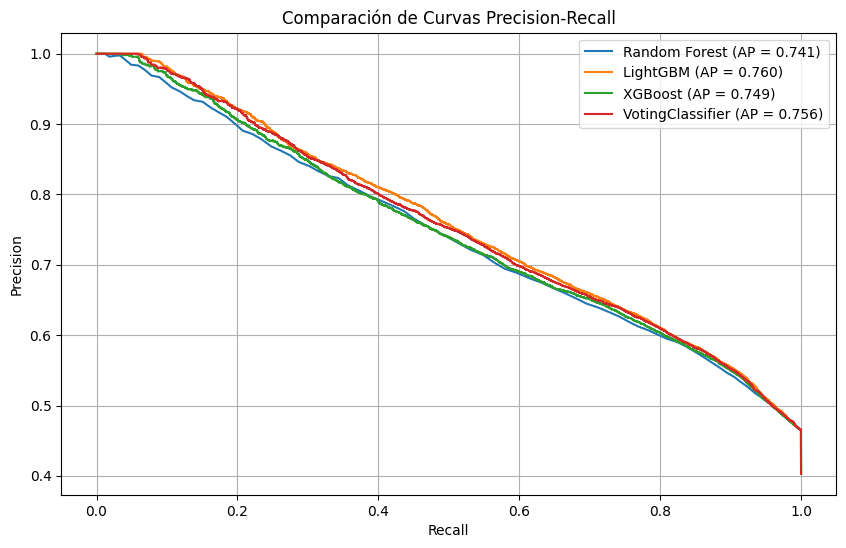

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from lightgbm import LGBMClassifier

all_models = {
    "Random Forest": rf_model,
    "LightGBM": lgb_model,
    "XGBoost": xgb_model,
    "VotingClassifier": voting_model
}

plt.figure(figsize=(10, 6))

for name, model in all_models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    ap = average_precision_score(y_test, y_scores)
    plt.plot(recall, precision, label=f"{name} (AP = {ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Comparación de Curvas Precision-Recall")
plt.legend()
plt.grid(True)
plt.show()

### Conclusiones del análisis (curva Precision-Recall):  

Se realizó la comparación entre precisión y recall de los tres modelos, observando que LigthGBM sigue funcionando mejor para clases desbalanceadas, aunque se realizará un balanceo es importante realizar este análisis, ya que, la curva Precision-Recall dice qué tan bien detecta el modelo (LigthGBM) los positivos reales y cuántos falsos positivos comete.

## Optimización de Hiperparámetros:

In [40]:
#RandomSearch

from sklearn.model_selection import RandomizedSearchCV

lgb_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1], 
    'boosting_type': ['gbdt'],  
    'num_leaves': [15, 31],  
    'n_estimators': [100, 200]
}

lgbm_model = RandomizedSearchCV(
    estimator=lgb.LGBMClassifier(),
    param_distributions=lgb_grid,  
    scoring="recall",
    n_iter=20,
    cv=5,
    verbose=True,
    random_state=42
)


lgbm_model.fit(X_train_bal, y_train_bal)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 60758, number of negative: 60758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1634
[LightGBM] [Info] Number of data points in the train set: 121516, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 60759, number of negative: 60758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1637
[LightGBM] [Info] Number of data points in the train set: 121517, number of used features: 27
[LightGBM

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=20,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'num_leaves': [15, 31]},
                   random_state=42, scoring='recall', verbose=True)

In [41]:
lgb_ideal_model = lgb.LGBMClassifier(**lgbm_model.best_params_)
lgb_ideal_model.fit(X_train_bal, y_train_bal)

[LightGBM] [Info] Number of positive: 75948, number of negative: 75948
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1651
[LightGBM] [Info] Number of data points in the train set: 151896, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(max_depth=7, n_estimators=200, num_leaves=15)

In [42]:
y_pred_rs = lgb_ideal_model.predict(X_test)
y_pred_rs

array([0, 1, 0, ..., 0, 0, 0], shape=(31671,))

In [43]:
from sklearn.metrics import recall_score

recall_lgb = recall_score(y_test, y_pred_rs)

print(f'Resultados randomSearch:')
print(f'Recall score: {recall_lgb}')

Resultados randomSearch:
Recall score: 0.699177438307873


In [44]:
#GridSearch
from sklearn.model_selection import GridSearchCV

lgb_grid2 = {
    'max_depth': [5, 7],
    'learning_rate': [0.05, 0.1],
    'boosting_type': ['gbdt'],
    'num_leaves': [31, 63],
    'n_estimators': [100, 200]
}

lgbm_model_2 = GridSearchCV(
    estimator=lgb.LGBMClassifier(),
    param_grid=lgb_grid2,
    scoring="recall",  # prioriza recall
    cv=3,
    verbose=1,
    n_jobs=-1
)


lgbm_model_2.fit(X_train_bal, y_train_bal)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Number of positive: 50632, number of negative: 50632
[LightGBM] [Info] Number of positive: 50632, number of negative: 50632
[LightGBM] [Info] Number of positive: 50632, number of negative: 50632
[LightGBM] [Info] Number of positive: 50632, number of negative: 50632
[LightGBM] [Info] Number of positive: 50632, number of negative: 50632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1630
[LightGBM] [Info] Number of data points in the train set: 101264, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032141 seconds.
You can set `force_row_wise=true` to remove the

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.05, 0.1], 'max_depth': [5, 7],
                         'n_estimators': [100, 200], 'num_leaves': [31, 63]},
             scoring='recall', verbose=1)

In [45]:
lgb_ideal_model_2 = lgb.LGBMClassifier(**lgbm_model_2.best_params_)
lgb_ideal_model_2.fit(X_train_bal, y_train_bal)

[LightGBM] [Info] Number of positive: 75948, number of negative: 75948
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1651
[LightGBM] [Info] Number of data points in the train set: 151896, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(learning_rate=0.05, max_depth=7)

In [46]:
y_pred_2 = lgb_ideal_model_2.predict(X_test)
y_pred_2

array([0, 1, 0, ..., 0, 0, 0], shape=(31671,))

In [47]:
from sklearn.metrics import recall_score

recall_score_lgb3 = recall_score(y_test, y_pred_2)

print(f'Resultados GridSearch:')
print(f'Recall_score: {recall_score_lgb3}')

Resultados GridSearch:
Recall_score: 0.7137485311398355


## Optimización de hiperparámetros con datos balanceados(Pipeline).

Aunque el resultado anterior puede parecer mejor, es necesario utilizar datos balanceados desde un pipeline para evitar fuga de datos.

### GridSearch con Datos balanceados (Pipeline).

In [49]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Pipeline: primero balanceo, luego modelo
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', LGBMClassifier(random_state=42))
])

# Hiperparámetros a optimizar
param_grid_bal = {
    'clf__max_depth': [5, 7],
    'clf__learning_rate': [0.05, 0.1],
    'clf__boosting_type': ['gbdt'],
    'clf__num_leaves': [31, 63],
    'clf__n_estimators': [100, 200]
}

# Validación cruzada estratificada para clases desbalanceadas
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch sobre el pipeline
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid_bal,
    scoring='recall',  # o 'recall' si priorizas recall
    cv=cv,
    n_jobs=-1
)

# Entrenar con datos originales (no balanceados externamente)
grid.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid.best_params_)

[LightGBM] [Info] Number of positive: 60759, number of negative: 60759
[LightGBM] [Info] Number of positive: 60758, number of negative: 60758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1644
[LightGBM] [Info] Number of data points in the train set: 121518, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1637
[LightGBM] [Info] Number of data points in the train set: 121516, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0

In [63]:
y_pred_gbal = grid.predict(X_test)
y_pred_gbal

array([0, 1, 0, ..., 0, 0, 0], shape=(31671,))

In [65]:
from sklearn.metrics import recall_score

recall_score_lgb_grid_bal = recall_score(y_test, y_pred_gbal)

print(f'Resultados GridSearch con Datos Balanceados:')
print(f'Recall_score: {recall_score_lgb_grid_bal}')

Resultados GridSearch con Datos Balanceados:
Recall_score: 0.7137485311398355


### RandomSearch con Datos balanceados (Pipeline).

In [53]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier

# 2. Hiperparámetros adaptados para RandomizedSearchCV
lgb_grid_rs_bal = {
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.05, 0.1],
    'clf__boosting_type': ['gbdt'],
    'clf__num_leaves': [15, 31],
    'clf__n_estimators': [100, 200]
}

# 3. Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. RandomizedSearchCV optimizando recall
lgbm_model_rs_bal = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=lgb_grid_rs_bal,
    n_iter=20,  # Puedes reducir si va muy lento
    scoring="recall",  # o "f1" si cambias de prioridad
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# 5. Entrenamiento sobre datos originales (no balanceados por fuera)
lgbm_model_rs_bal.fit(X_train, y_train)

# 6. Resultados
print("Mejores hiperparámetros:", lgbm_model_rs_bal.best_params_)
print("Mejor recall promedio en validación:", lgbm_model_rs_bal.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 60758, number of negative: 60758
[LightGBM] [Info] Number of positive: 60758, number of negative: 60758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1643
[LightGBM] [Info] Number of data points in the train set: 121516, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.195548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1638
[LightGBM] [Info] Number of data points in the train set: 121516, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

In [61]:
y_pred_rs_bal = lgbm_model_rs_bal.predict(X_test)
y_pred_rs_bal

array([0, 1, 0, ..., 0, 0, 0], shape=(31671,))

In [66]:
from sklearn.metrics import recall_score

recall_score_lgb_rsbal = recall_score(y_test, y_pred_rs_bal)

print(f'Resultados RandomSearch con Datos Balanceados:')
print(f'Recall_score: {recall_score_lgb_rsbal}')

Resultados RandomSearch con Datos Balanceados:
Recall_score: 0.7300430865648257


## Matriz de Confusión.

Text(50.722222222222214, 0.5, 'Real')

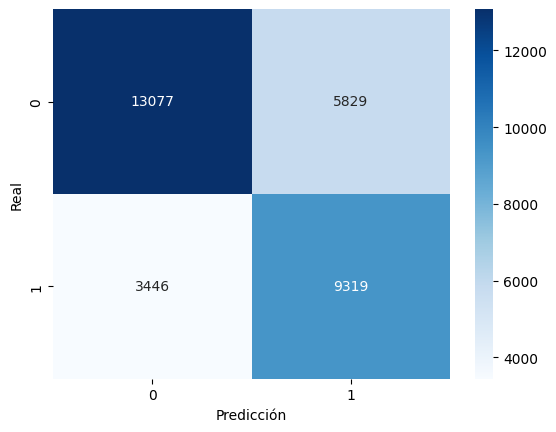

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rs_bal)

# Visualización con seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')

## Observaciones sobre la Matriz de Confusión:
La matriz de confusión evidencia que el modelo tiene un rendimiento razonable en clasificación binaria, con una alta cantidad de verdaderos positivos (9319) y verdaderos negativos (13077), lo que genera una precisión global del 73.8%. Sin embargo, también muestra una cantidad significativa de falsos positivos (5829) y falsos negativos (3446), lo que indica que el modelo comete errores de clasificación importantes en ambos sentidos.

[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


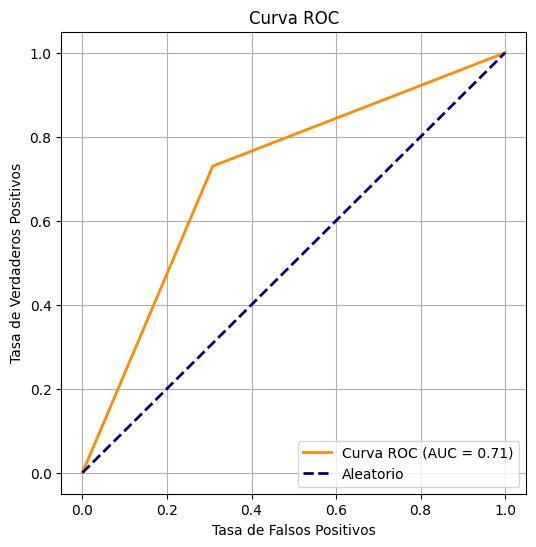

In [68]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict_proba(X_test)[:, 1]

# Calcular FPR, TPR y umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rs_bal)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Observaciones y Conclusiones sobre la curva ROC:
El AUC (Área bajo la curva) de 0.71 indica que el modelo tiene una capacidad aceptable para distinguir entre las clases positivas y negativas. Aunque no es excelente, supera claramente el rendimiento de un clasificador aleatorio (AUC = 0.5), lo que sugiere que el modelo tiene potencial práctico.
Interpretación del AUC = 0.71:

El modelo tiene un 71% de probabilidad de clasificar correctamente una instancia positiva aleatoria por encima de una negativa.

En términos generales:

0.5–0.6: pobre

0.6–0.7: regular

0.7–0.8: aceptable

0.8–0.9: muy bueno

=>0.9: excelente

Forma de la curva:

La curva se eleva rápidamente desde el origen (0,0), lo que indica que el modelo es capaz de capturar muchos verdaderos positivos inicialmente.

Sin embargo, la ganancia adicional se vuelve menos pronunciada, lo cual sugiere que puede haber un trade-off entre sensibilidad y especificidad en ciertos umbrales.



In [69]:
from sklearn.metrics import accuracy_score, roc_auc_score

# En entrenamiento
y_train_pred = lgbm_model_rs_bal.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, y_train_pred)

# En test
y_test_pred = lgbm_model_rs_bal.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_pred)

print(f"AUC entrenamiento: {train_auc:.2f}")
print(f"AUC prueba: {test_auc:.2f}")


AUC entrenamiento: 0.80
AUC prueba: 0.79


In [70]:
from sklearn.metrics import classification_report

# y_test: etiquetas reales
# y_pred: etiquetas predichas por el modelo
print(classification_report(y_test, y_pred_rs_bal))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74     18906
           1       0.62      0.73      0.67     12765

    accuracy                           0.71     31671
   macro avg       0.70      0.71      0.70     31671
weighted avg       0.72      0.71      0.71     31671



## Guardar Modelo.

In [72]:
import pickle

with open('./models/model_LGBMClassifier_Heart_Atack.sav', 'wb') as file:pickle.dump(lgbm_model_rs_bal, file)